In [1]:
import numpy as np
import matplotlib.pyplot as plt

x, y = [], []
for i in range(1,11):
    x.append(i)
    y.append(i*4 + 7)
print("x: ", x)
print("y: ", y)

x:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y:  [11, 15, 19, 23, 27, 31, 35, 39, 43, 47]


In [2]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

x = np.array(x).reshape(-1,1)
y = np.array(y)

reg.fit(x,y)
print("coef_ : ", reg.coef_)
print("intercept_ :", reg.intercept_)

coef_ :  [4.]
intercept_ : 7.000000000000011


7.000000000


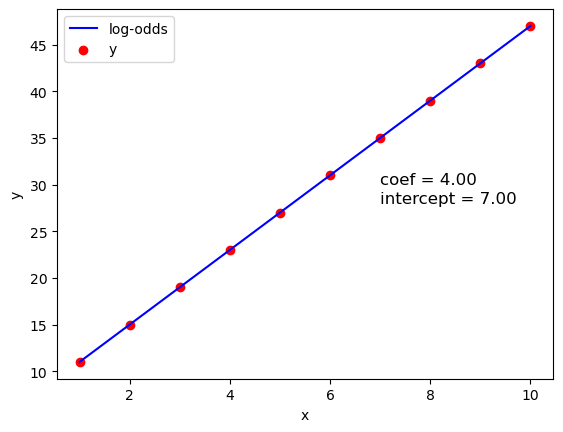

In [30]:
plt.figure()
plt.plot(x, x*reg.coef_[0] + reg.intercept_, color='blue')
plt.scatter(x,y, color='red')

plt.text(7,30, 'coef = %.2f' %reg.coef_[0], size = 12)
plt.text(7,28, 'intercept = %.2f' %reg.intercept_, size=12)

print('%.9f' %reg.intercept_)
plt.legend(['log-odds','y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [48]:
import pandas as pd
df = pd.read_csv('국민건강보험공단_건강검진정보_20211231_수정.CSV', encoding='cp949')
pd.set_option('display.max_columns', None)
print(df.shape)

(1000000, 30)


In [49]:
df.dropna(how = 'any', axis=0, inplace=True)

In [59]:
df.drop(['기준년도', '가입자일련번호', '시도코드', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '구강검진수검여부', '치아우식증유무', '치석'],
       axis=1, inplace=True)

In [65]:
from sklearn.model_selection import train_test_split

x = df.drop('LDL콜레스테롤', axis=1)
y = df['LDL콜레스테롤']


X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.3, random_state = 99)
print(X_train.shape, y_train.shape)

(78488, 19) (78488,)


In [66]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_, lr.intercept_)


[-2.05559065e-01 -2.14074379e-02  2.55864469e-03 -9.58256653e-03
  2.53495285e-02 -7.18007817e-04  5.24819843e-04 -2.89990309e-04
  9.93924369e-01 -1.93066099e-01 -9.65292255e-01  3.27625079e-02
  1.40847092e-01 -1.57940147e-01 -4.03509162e-03  2.98449672e-03
 -4.44539296e-04  3.70678482e-02 -1.46679713e-02] -3.1761648595483365


In [68]:
from sklearn.metrics import mean_squared_error

y_pred = lr.predict(X_val)
print("mse : ", mean_squared_error(y_pred, y_val))

mse :  10.708696671840485


# Logistic Regression

In [79]:
x = np.random.randint(0,1000, size=3000)
y = [0 if a < 500 else 1 for a in x]

X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.33,random_state=1)

X_train=np.array(X_train).reshape(-1,1)
X_val=np.array(X_val).reshape(-1,1)
y_train=np.array(y_train)
y_val=np.array(y_val)

print(X_train.shape, y_train.shape)
print(X_train)
print(y_train[:10])

(2010, 1) (2010,)
[[482]
 [763]
 [529]
 ...
 [587]
 [779]
 [819]]
[0 1 1 0 0 1 1 0 1 0]


In [86]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [103]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_, lr.intercept_)

y = X_train * lr.coef_[0] + lr.intercept_
y_sig = sigmoid(y)
print(X_train, y_sig)

[[1.3882991]] [-693.734141]
[[482]
 [763]
 [529]
 ...
 [587]
 [779]
 [819]] [[2.12646623e-11]
 [1.00000000e+00]
 [1.00000000e+00]
 ...
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]]


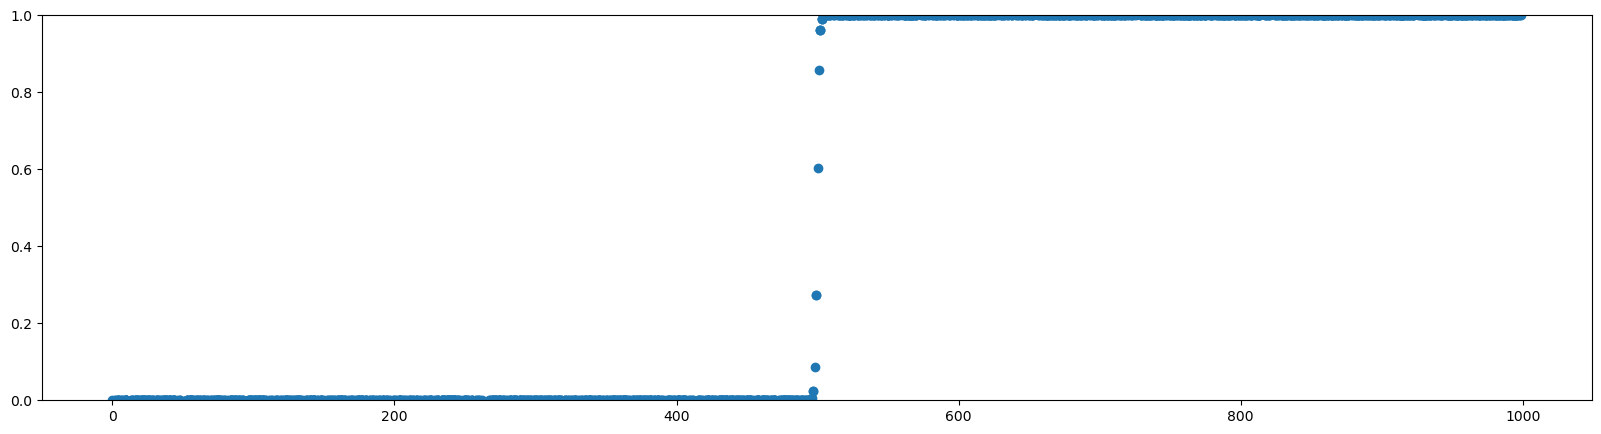

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
#plt.plot(X_train, y)
plt.scatter(X_train, y_sig) 

plt.ylim([0,1])
plt.show()

In [85]:
X_train

array([[482],
       [763],
       [529],
       ...,
       [587],
       [779],
       [819]])

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('국민건강보험공단_건강검진정보_20211231_수정.CSV', encoding='cp949')
df = df[['신장(5cm단위)','성별','체중(5kg단위)','음주여부']]
df.head(3)

,신장(5cm단위),성별,체중(5kg단위),음주여부
0,160,1,65,1.0
1,175,1,90,1.0
2,160,1,55,1.0


In [14]:
df = df.dropna(axis=0)

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(['음주여부'], axis=1)
y = df['음주여부']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

학습 정확도 :  0.6897831253602179
검증 정확도 :  0.6901423241951131


In [36]:
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

for i in [2,3]:
    dt = DecisionTreeClassifier(max_depth = i, max_features=3, min_samples_split = 400000)
    dt.fit(X_train, y_train)
        
    print("학습 정확도 : ", dt.score(X_train, y_train))
    print("검증 정확도 : ", dt.score(X_val, y_val))
        
    tree_graph = graphviz.Source(export_graphviz(dt,
                                                class_names=['O','X'],
                                                feature_names = ['height','sex','weight'],
                                                impurity=True,
                                                filled=True))
    tree_graph.render('max_depth - %d' %(i), format='png')

학습 정확도 :  0.6829607070210774
검증 정확도 :  0.682676054929338
학습 정확도 :  0.6829607070210774
검증 정확도 :  0.682676054929338


In [44]:
print('%10.5d %10.1f' %(1, 2.2))

     00001        2.2


In [49]:
from sklearn.ensemble import RandomForestClassifier

for features in [40, 50, 60]:
    dtc = RandomForestClassifier(max_depth = 3,
                                max_features = features,
                                n_estimators=100,
                                random_state = 0)
    dtc.fit(X_train, y_train)
    s1 = dtc.score(X_train, y_train)
    s2 = dtc.score(X_val, y_val)
    
    print("%d 정확도 : " %features, s1, s2)

40 정확도 :  0.6900931784568107 0.6902623445985817
50 정확도 :  0.6900931784568107 0.6902623445985817
60 정확도 :  0.6900931784568107 0.6902623445985817
